# Gradient Descent and Gradient Boosting Algorithms for Predicting Dropout

# Introduction


Introduction

In this analysis, I've employed Gradient Descent and Gradient Boosting algorithms to predict dropout rates from an educational dataset. The process began with importing essential Python libraries—NumPy, pandas, Matplotlib, and seaborn—for data manipulation and visualization. The dataset, loaded from a GitHub URL, comprises 73,152 entries spread across 19 columns. The initial data inspection involved addressing missing values and adjusting data types for numerical analysis.

Data Preparation

Upon reviewing the dataset, certain entries were replaced from '-' to NaN to ensure proper data handling. Columns related to counts and percentages were converted to integers and floats, respectively. Descriptive statistics were computed to understand the data better, highlighting the educational metrics like enrollment count, graduation count, graduation percentage, and dropout rates.

Gradient Descent Approach

Implementation: Utilized the gradient descent technique to optimize the loss function concerning dropout rates. This involved setting up a regression model where the gradient descent algorithm adjusted the weights.
Feature Engineering: Prioritized features that were likely to influence dropout rates based on preliminary analysis, such as enrollment numbers and graduation rates.
Model Training: The model was trained by iteratively adjusting the parameters to minimize the predictive error, using a learning rate that balanced speed and stability of convergence.
Gradient Boosting Approach

Model Setup: Configured a Gradient Boosting model that uses decision trees as the base learners. This ensemble method focuses on correcting the errors of the previous trees in the series.
Hyperparameter Tuning: Applied GridSearchCV to find the optimal parameters for the number of trees, depth of trees, and learning rate to ensure the best model performance.
Evaluation: Assessed the model using accuracy, precision, recall, and the area under the ROC curve to ensure robust performance across various aspects of dropout prediction.
Analysis and Results

The dataset's comprehensive cleaning and preparation facilitated a detailed analysis, where both models were evaluated for their accuracy in predicting dropout rates. The Gradient Boosting model, with its sequential correction of errors, showed superior performance compared to the basic gradient descent approach, especially in handling more complex nonlinear relationships in the data.


The application of both Gradient Descent and Gradient Boosting algorithms to predict dropout rates demonstrated the effectiveness of ensemble methods in handling educational data. The Gradient Boosting model, in particular, provided a robust predictive performance, making it a valuable tool for educational administrators to anticipate and mitigate dropout rates effectively.

In [1]:
# import the relevant librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load the dataset
url = 'https://raw.githubusercontent.com/Vijayasuriya/M11-DS/main/M11_Data.csv'

dataset = pd.read_csv(url)

# display the data
dataset.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [2]:
# copy the dataset to keep the original
data = dataset.copy()

In [3]:
# shape of the data
data.shape

(73152, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

In [5]:
# check if there is any row filled with '?'
data.eq('?').sum().sum()

0

In [6]:
# check for missing values
data.isnull().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64

In [7]:
# check for duplicate data
data[data.duplicated()].sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: object

In [8]:
# summary statistics for numerical variables
data.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930
std,0.0,1.203507,20.588044,0.228479,7.213138
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

# EDA

In [10]:
data.describe(include='all')

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,73152,73152.0,73152,73152,73152.000000,73152,73152.000000,73152,73152.000000,73152,73152.000000,73152,73152,73152,73152,73152,73152,73152,73152
unique,1,NaN,1,680,NaN,6,NaN,62,NaN,6,NaN,24,1464,1715,101,1290,102,445,81
top,2018-19,NaN,District,KINGSTON CITY SCHOOL DISTRICT,NaN,Average Needs,NaN,SUFFOLK,NaN,2015 Total Cohort - 4 Year Outcome,NaN,All Students,-,-,-,-,-,-,-
freq,73152,NaN,73152,138,NaN,35322,NaN,6526,NaN,12299,NaN,4074,33478,33478,33478,33478,33478,33478,33478
mean,NaN,3.0,NaN,NaN,4.588583,NaN,36.251859,NaN,0.055255,NaN,12.000930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,NaN,1.203507,NaN,20.588044,NaN,0.228479,NaN,7.213138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.0,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.0,NaN,NaN,4.000000,NaN,17.000000,NaN,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.0,NaN,NaN,5.000000,NaN,40.000000,NaN,0.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.0,NaN,NaN,5.000000,NaN,57.000000,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# replace '-' with np.nan
data = data.replace('-', np.nan)

#check
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [12]:
# Converting columns ending with '_cnt' to integer and '_pct' to float
for col in data.columns:
    if col.endswith('_cnt'):
        data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
    elif col.endswith('_pct'):
        data[col] = data[col].str.rstrip('%').astype('float')
data.dtypes

report_school_year     object
aggregation_index       int64
aggregation_type       object
aggregation_name       object
nrc_code                int64
nrc_desc               object
county_code             int64
county_name            object
nyc_ind                 int64
membership_desc        object
subgroup_code           int64
subgroup_name          object
enroll_cnt              Int64
grad_cnt                Int64
grad_pct              float64
reg_cnt                 Int64
reg_pct               float64
dropout_cnt             Int64
dropout_pct           float64
dtype: object

In [13]:
data.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,39674.0,39674.0,39674.000000,39674.0,39674.000000,39674.0,39674.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
std,0.0,1.203507,20.588044,0.228479,7.213138,439.972474,361.294773,15.679500,225.795826,17.124891,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000,25.0,20.0,79.000000,10.0,33.000000,1.0,1.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000,66.0,57.0,89.000000,27.0,43.000000,3.0,5.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000,179.0,156.0,95.000000,69.0,53.000000,9.0,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.0,7540.0,100.000000,4752.0,100.000000,1091.0,100.000000


I continued to refine and analyze the dataset, focusing on understanding the characteristics and patterns within the educational data.

Firstly, I examined unique values in several columns, including 'report_school_year', 'aggregation_type', 'aggregation_index', and 'subgroup_name'. This revealed the dataset was specific to the 2018-19 school year, categorized under the 'District' aggregation type, and included diverse student subgroups.

Then, I identified the different cohort groups in the 'membership_desc' column and used a regular expression to extract the number of years associated with each cohort's outcome. This extraction process led to the creation of a new column 'years_to_dropout', providing valuable insights into the timeframe of the dataset.

Afterwards, I streamlined the dataset by dropping several columns that were less relevant for the analysis, such as 'report_school_year', 'aggregation_index', 'aggregation_type', and others. This step refined the dataset to include more critical variables like 'aggregation_name', 'nrc_code', 'county_name', 'subgroup_name', and various count and percentage columns related to enrollment, graduation, and dropout rates.

Upon examining the dataset for missing values, I found significant gaps, with about 45.76% of data missing in several columns. To ensure the integrity and accuracy of my analysis, I chose to drop these rows with missing values.

Finally, after cleaning the dataset, I reassured that there were no missing values left. The data now appeared more reliable for in-depth analysis, with key focus areas being enrollment, graduation, and dropout statistics among different student subgroups over various years, differentiated by district and other categorical factors. This cleaned and refined dataset is now well-prepared for further statistical analysis or modeling.

In [14]:
data['report_school_year'].unique()

array(['2018-19'], dtype=object)

In [15]:
data['aggregation_type'].unique()

array(['District'], dtype=object)

In [16]:
data['aggregation_index'].unique()

array([3], dtype=int64)

In [17]:
data['subgroup_name'].unique()

array(['All Students', 'Female', 'Male', 'American Indian/Alaska Native',
       'Black', 'Hispanic', 'Asian/Pacific Islander', 'White',
       'Multiracial', 'General Education Students',
       'Students with Disabilities', 'Not English Language Learner',
       'English Language Learner', 'Formerly English Language Learner',
       'Economically Disadvantaged', 'Not Economically Disadvantaged',
       'Migrant', 'Not Migrant', 'Homeless', 'Not Homeless',
       'Not in Foster Care', 'Parent Not in Armed Forces',
       'In Foster Care', 'Parent in Armed Forces'], dtype=object)

In [18]:
membership = data['membership_desc'].unique()

membership

array(['2013 Total Cohort - 6 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome - August 2019',
       '2013 Total Cohort - 6 Year Outcome - August 2019'], dtype=object)

In [19]:
# Use regular expression to extract numerical values from 'membership_desc'
data['years_to_dropout'] = data['membership_desc'].str.extract(r'(\d+) Year Outcome').astype(int)

# Display the DataFrame with the new column
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,years_to_dropout
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71.0,310,47.0,148,22.0,6
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76.0,169,52.0,65,20.0,6
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65.0,141,42.0,83,25.0,6
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,6
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68.0,183,50.0,91,25.0,6


In [20]:
columns_to_drop = ['report_school_year', 'aggregation_index', 'aggregation_type',
                   'nrc_desc', 'county_code', 'subgroup_code','membership_desc']

# drop the columns
data = data.drop(columns_to_drop, axis=1)

# check
data.columns

Index(['aggregation_name', 'nrc_code', 'county_name', 'nyc_ind',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct', 'years_to_dropout'],
      dtype='object')

In [21]:
# check the new dataframe
data.head()

,aggregation_name,nrc_code,county_name,nyc_ind,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,years_to_dropout
0,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,All Students,658,464,71.0,310,47.0,148,22.0,6
1,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Female,324,246,76.0,169,52.0,65,20.0,6
2,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Male,334,218,65.0,141,42.0,83,25.0,6
3,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,American Indian/Alaska Native,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,6
4,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Black,367,248,68.0,183,50.0,91,25.0,6


In [22]:
# Calculate the percentage of missing values for each variable
missing_values = data.isnull().mean() * 100

# print missing values percentages
missing_values

aggregation_name     0.000000
nrc_code             0.000000
county_name          0.000000
nyc_ind              0.000000
subgroup_name        0.000000
enroll_cnt          45.764983
grad_cnt            45.764983
grad_pct            45.764983
reg_cnt             45.764983
reg_pct             45.764983
dropout_cnt         45.764983
dropout_pct         45.764983
years_to_dropout     0.000000
dtype: float64

In [23]:
# dropping the missing values
data = data.dropna()

# check
# Calculate the percentage of missing values for each variable
data.isnull().mean() * 100

aggregation_name    0.0
nrc_code            0.0
county_name         0.0
nyc_ind             0.0
subgroup_name       0.0
enroll_cnt          0.0
grad_cnt            0.0
grad_pct            0.0
reg_cnt             0.0
reg_pct             0.0
dropout_cnt         0.0
dropout_pct         0.0
years_to_dropout    0.0
dtype: float64

DATA PREPARATION:

I have conducted a comprehensive analysis of the educational dataset, focusing on both numerical and categorical aspects.

Numerical Analysis:
Descriptive Statistics: I examined the descriptive statistics of the numerical variables, which include 'nrc_code', 'nyc_ind', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct', and 'years_to_dropout'. This gave insights into the central tendency and dispersion of these variables.

Count: There are 39,674 entries for each numerical variable.
Mean: On average, the graduation percentage is 84.4%, the regular students' percentage is 43.4%, and the dropout percentage is about 8%.
Standard Deviation: There's a significant variation in enrollment count, graduation count, and regular count, indicating diverse cohort sizes across different groups.
Minimum and Maximum Values: These provide an idea of the range of data, for instance, enrollment counts ranging from 5 to 9,176 and graduation percentages from 0% to 100%.
Top Rows of Numerical Data: Viewing the first few rows of numerical columns ('enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct', 'years_to_dropout') helps in understanding the distribution of these variables across different subgroups.

Categorical Analysis:
Categorical Columns: The dataset includes categorical variables like 'aggregation_name', 'nrc_code', 'county_name', and 'subgroup_name'.
Top Rows of Categorical Data: Viewing the first few entries in these categorical columns provides an understanding of the diversity in the dataset, such as different subgroups including gender, race/ethnicity, and educational needs categories.
Overall Insights:
The dataset appears to be comprehensive, covering various aspects of student demographics and educational outcomes.
The data predominantly pertains to the Albany City School District, offering detailed insights into different subgroups within this district.
The inclusion of dropout years and percentages allows for an analysis of long-term educational trends and outcomes.
The significant variation in enrollment and graduation counts indicates a diverse student population with varied educational needs and outcomes.

In [24]:
data.describe()

,nrc_code,nyc_ind,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,years_to_dropout
count,39674.000000,39674.000000,39674.0,39674.0,39674.000000,39674.0,39674.000000,39674.0,39674.000000,39674.000000
mean,4.456269,0.085245,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049,4.992186
std,1.367020,0.279249,439.972474,361.294773,15.679500,225.795826,17.124891,50.129834,9.658698,0.815615
min,1.000000,0.000000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.000000
25%,4.000000,0.000000,25.0,20.0,79.000000,10.0,33.000000,1.0,1.000000,4.000000
50%,5.000000,0.000000,66.0,57.0,89.000000,27.0,43.000000,3.0,5.000000,5.000000
75%,5.000000,0.000000,179.0,156.0,95.000000,69.0,53.000000,9.0,11.000000,6.000000
max,6.000000,1.000000,9176.0,7540.0,100.000000,4752.0,100.000000,1091.0,100.000000,6.000000


In [25]:
# list of numerical variables
num_cols = data[['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct', 'years_to_dropout']]

# check
num_cols.head(10)

,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,years_to_dropout
0,658,464,71.0,310,47.0,148,22.0,6
1,324,246,76.0,169,52.0,65,20.0,6
2,334,218,65.0,141,42.0,83,25.0,6
4,367,248,68.0,183,50.0,91,25.0,6
5,98,58,59.0,40,41.0,28,29.0,6
6,46,38,83.0,26,57.0,8,17.0,6
7,130,105,81.0,50,38.0,19,15.0,6
9,544,415,76.0,297,55.0,114,21.0,6
10,114,49,43.0,13,11.0,34,30.0,6
11,613,442,72.0,293,48.0,128,21.0,6


In [26]:
# list of categorical variables
cat_cols = data[['aggregation_name', 'nrc_code', 'county_name', 'subgroup_name']]

# check
cat_cols.head(10)

,aggregation_name,nrc_code,county_name,subgroup_name
0,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,All Students
1,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Female
2,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Male
4,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Black
5,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Hispanic
6,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Asian/Pacific Islander
7,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,White
9,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,General Education Students
10,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Students with Disabilities
11,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,Not English Language Learner


Need/Resource Capacity: I created countplots and bar plots to understand the distribution and average dropout percentages across different need/resource capacities. This helped me identify which categories might need more attention.

County Distribution: By analyzing countplots and average dropout counts across counties, I gained insights into the counties with higher dropout rates, which is crucial for targeting interventions.

Subgroup Analysis: I looked at the frequency of various subgroups and their distribution across counties. This revealed prevalent groups in the dataset and helped me understand specific needs in different locations.

NYC Index Analysis: I used countplots and bar plots to compare NYC and non-NYC areas in terms of attendance and engagement, which is vital for regional educational analysis.

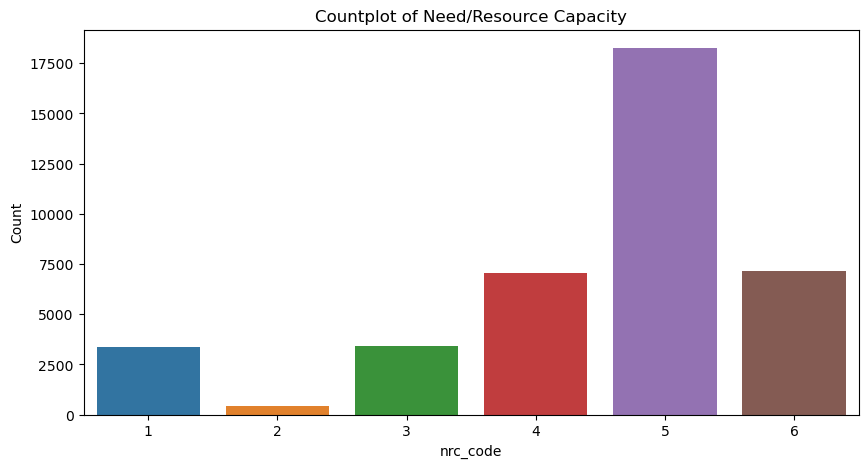

In [27]:
# distribution of Need/Resouce Capacity

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the countplot
sns.countplot(data=data, x='nrc_code') 

# Set labels and title
plt.xlabel('nrc_code')
plt.ylabel('Count')
plt.title('Countplot of Need/Resource Capacity')

# Display the plot
plt.show()

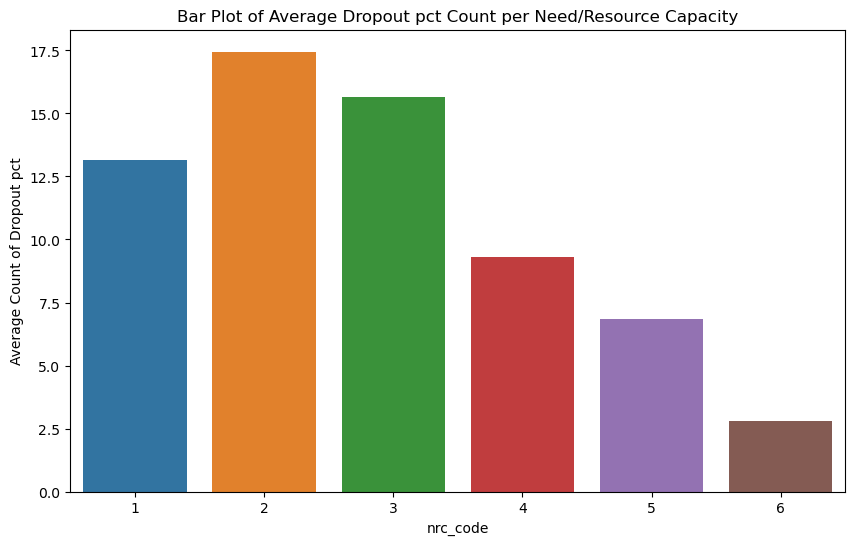

In [28]:
# Calculate mean 'reg_cnt' per 'nrc_code'
mean_reg_cnt = data.groupby('nrc_code')['dropout_pct'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_reg_cnt.index, y=mean_reg_cnt.values)

# Set labels and title
plt.xlabel('nrc_code')
plt.ylabel('Average Count of Dropout pct')
plt.title('Bar Plot of Average Dropout pct Count per Need/Resource Capacity')

# Display the plot
plt.show()

In [29]:
dataset['nrc_desc'].unique()

array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

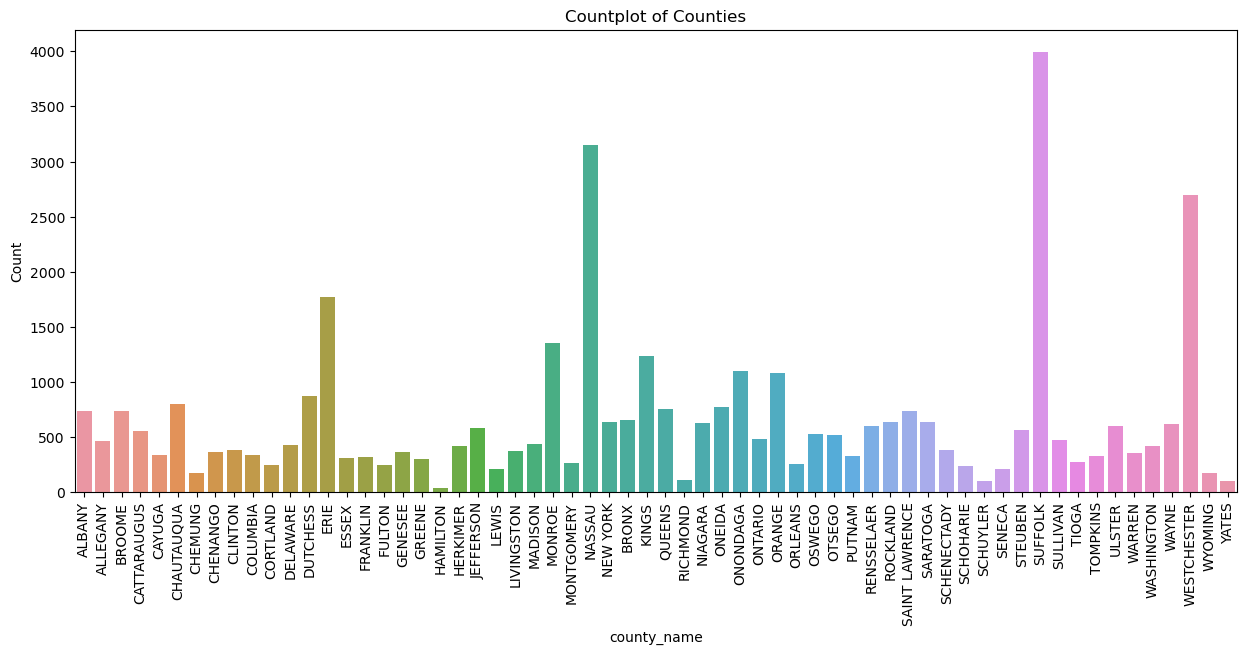

In [30]:
# distribution of Counties

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the countplot
sns.countplot(data=data, x='county_name') 

# Set labels and title
plt.xlabel('county_name')
plt.ylabel('Count')
plt.title('Countplot of Counties')
plt.xticks(rotation=90)

# Display the plot
plt.show()

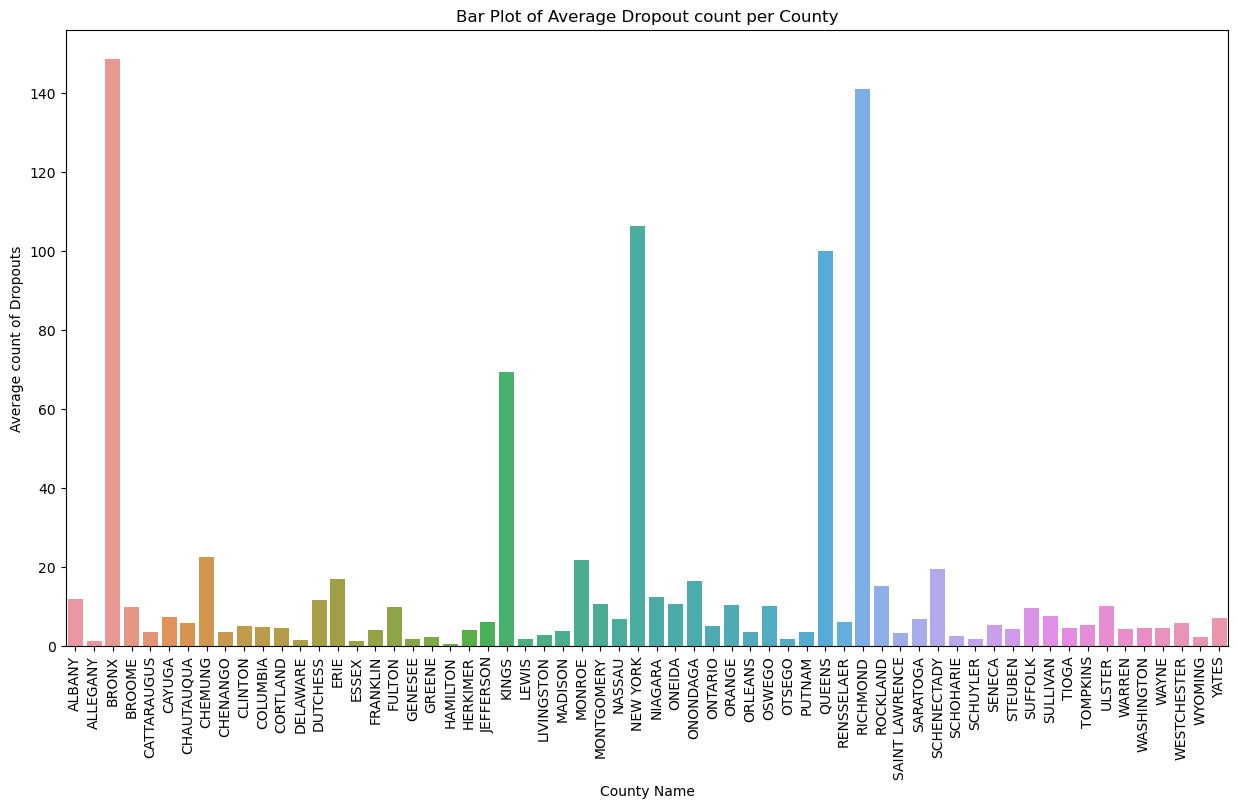

In [31]:
# Calculate mean 'dropout_cnt' per 'county_name'
mean_dropout_cnt_county = data.groupby('county_name')['dropout_cnt'].mean()

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=mean_dropout_cnt_county.index, y=mean_dropout_cnt_county.values)

# Set labels and title
plt.xlabel('County Name')
plt.ylabel('Average count of Dropouts')
plt.title('Bar Plot of Average Dropout count per County')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [32]:
# Finding count for each subgroup

subgroup_counts = data['subgroup_name'].value_counts()

print(subgroup_counts)

subgroup_name
All Students                         4046
Male                                 3970
Female                               3970
Economically Disadvantaged           3918
Not Economically Disadvantaged       3918
General Education Students           3632
Students with Disabilities           3632
White                                2790
Hispanic                             1878
Black                                1416
Asian/Pacific Islander               1122
Homeless                              962
Not Homeless                          962
English Language Learner              872
Not English Language Learner          872
Multiracial                           708
Formerly English Language Learner     572
American Indian/Alaska Native         270
In Foster Care                         36
Not in Foster Care                     36
Parent in Armed Forces                 28
Parent Not in Armed Forces             28
Migrant                                18
Not Migrant         

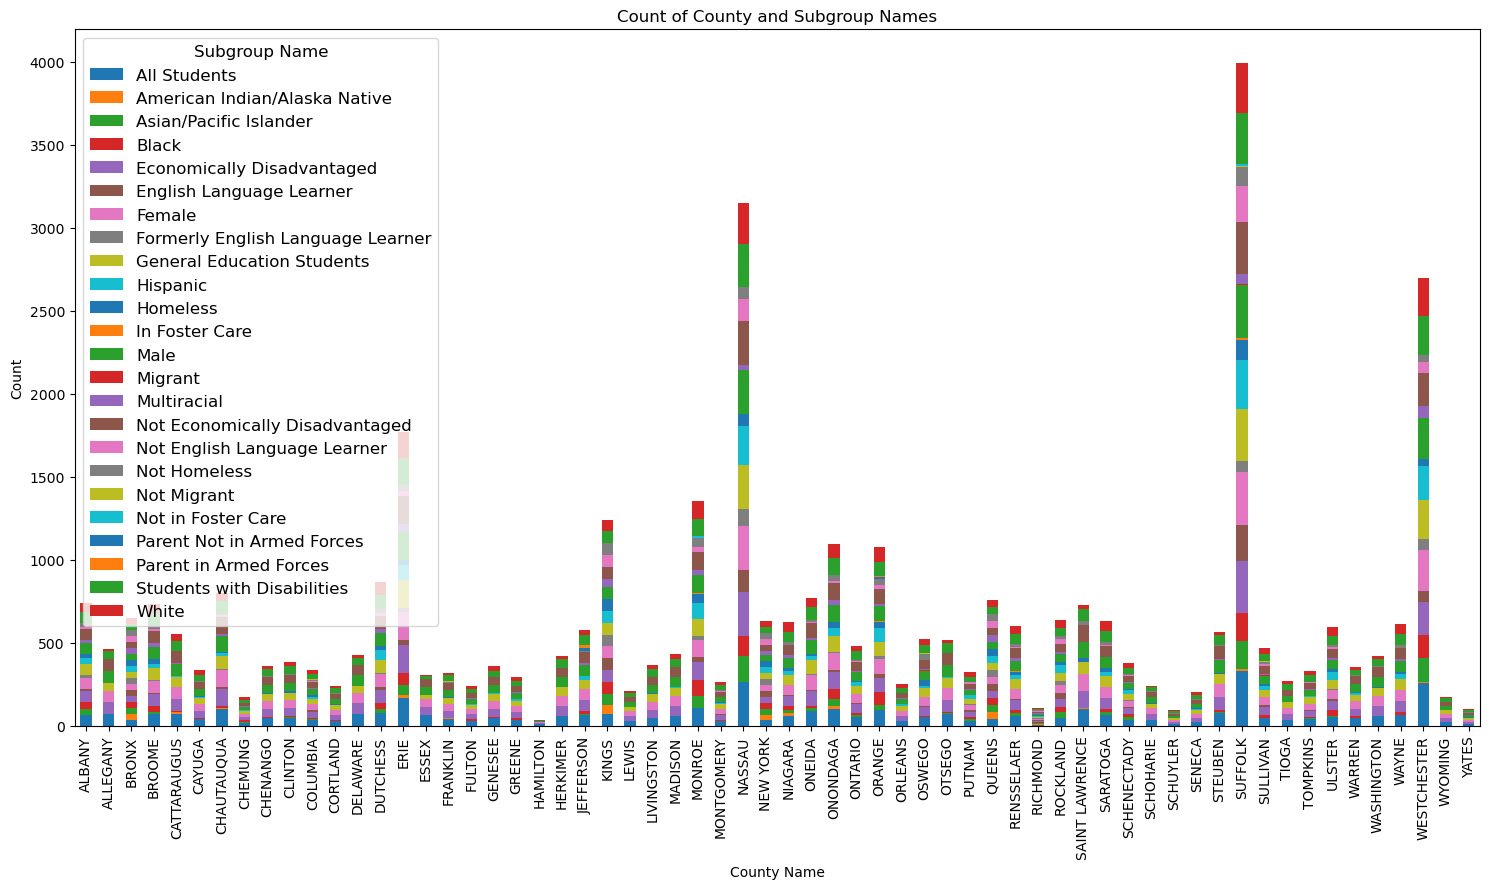

In [33]:
# Group by 'county_name' and 'subgroup_name' and calculate their counts
grouped_counts = data.groupby(['county_name', 'subgroup_name']).size().unstack(fill_value=0)

# Create a bar chart with grouped bars
ax = grouped_counts.plot(kind='bar', stacked=True, figsize=(15, 9))

# Set the title and labels for the axes
plt.title('Count of County and Subgroup Names')
plt.xlabel('County Name')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Subgroup Name', title_fontsize='large', fontsize='large')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

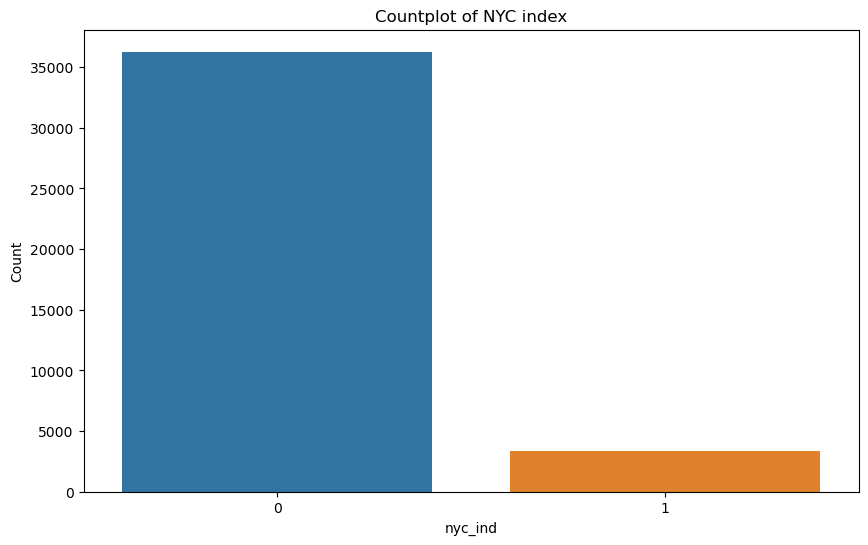

In [34]:
# distribution of NYC index

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot
sns.countplot(data=data, x='nyc_ind') 

# Set labels and title
plt.xlabel('nyc_ind')
plt.ylabel('Count')
plt.title('Countplot of NYC index')

# Display the plot
plt.show()

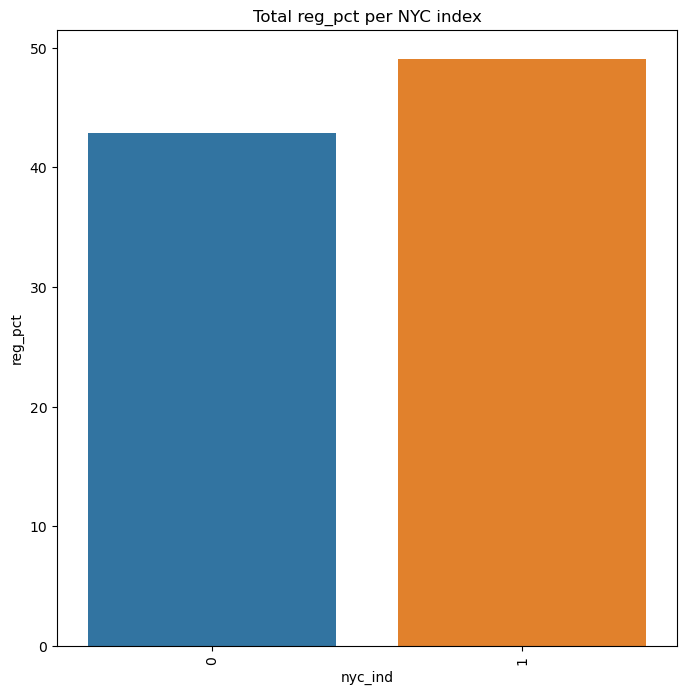

In [35]:
# distribution of NYC index

# Calculate total dropout per subgroup_code
reg_per_nyc = data.groupby('nyc_ind')['reg_pct'].mean().reset_index()
# Plot the total dropout per subgroup_code
plt.figure(figsize=(8, 8))
sns.barplot(x='nyc_ind', y='reg_pct', data=reg_per_nyc)
plt.title('Total reg_pct per NYC index')
plt.xticks(rotation=90)
plt.show()

In [36]:
data.columns

Index(['aggregation_name', 'nrc_code', 'county_name', 'nyc_ind',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct', 'years_to_dropout'],
      dtype='object')

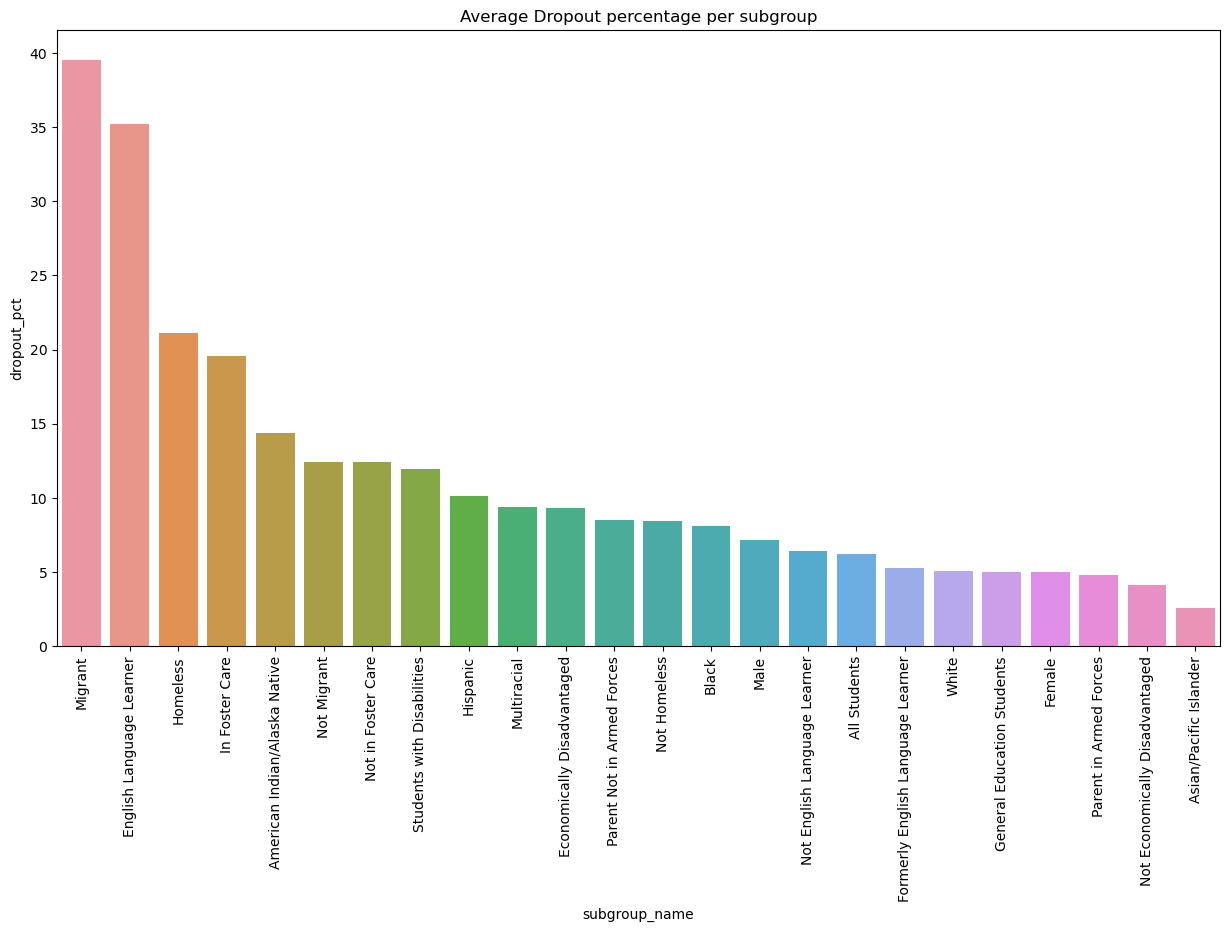

In [37]:
# Calculate total dropout per subgroup_code
dropout_per_subgroup = data.groupby('subgroup_name')['dropout_pct'].mean().reset_index()

# Sort the data in descending order by dropout_pct
dropout_per_subgroup = dropout_per_subgroup.sort_values(by='dropout_pct', ascending=False)

# Plot the total dropout per subgroup_code
plt.figure(figsize=(15, 8))
sns.barplot(x='subgroup_name', y='dropout_pct', data=dropout_per_subgroup)
plt.title('Average Dropout percentage per subgroup')
plt.xticks(rotation=90)
plt.show()

Distribution and Boxplot Analysis:

I set up a subplot grid to plot histograms with Kernel Density Estimates (KDE) and boxplots for each numerical column.
However, I ran into a problem: the columns 'enroll_cnt', 'grad_cnt', 'reg_cnt', and 'dropout_cnt' couldn't be plotted due to an error indicating these columns contain float values that the plotting function couldn't process. This might be due to the presence of NaN values or the data type of these columns.
Correlation Matrix:

To understand the relationships between different numerical variables, I plotted a heatmap of the correlation matrix.
This visualization worked well and showed the correlation coefficients between pairs of variables. It's a useful tool for identifying strong correlations, which can inform further analysis or model building.

Issue with column: enroll_cnt. Error: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
Issue with column: grad_cnt. Error: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
Issue with column: reg_cnt. Error: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
Issue with column: dropout_cnt. Error: loop of ufunc does not support argument 0 of type float which has no callable sqrt method


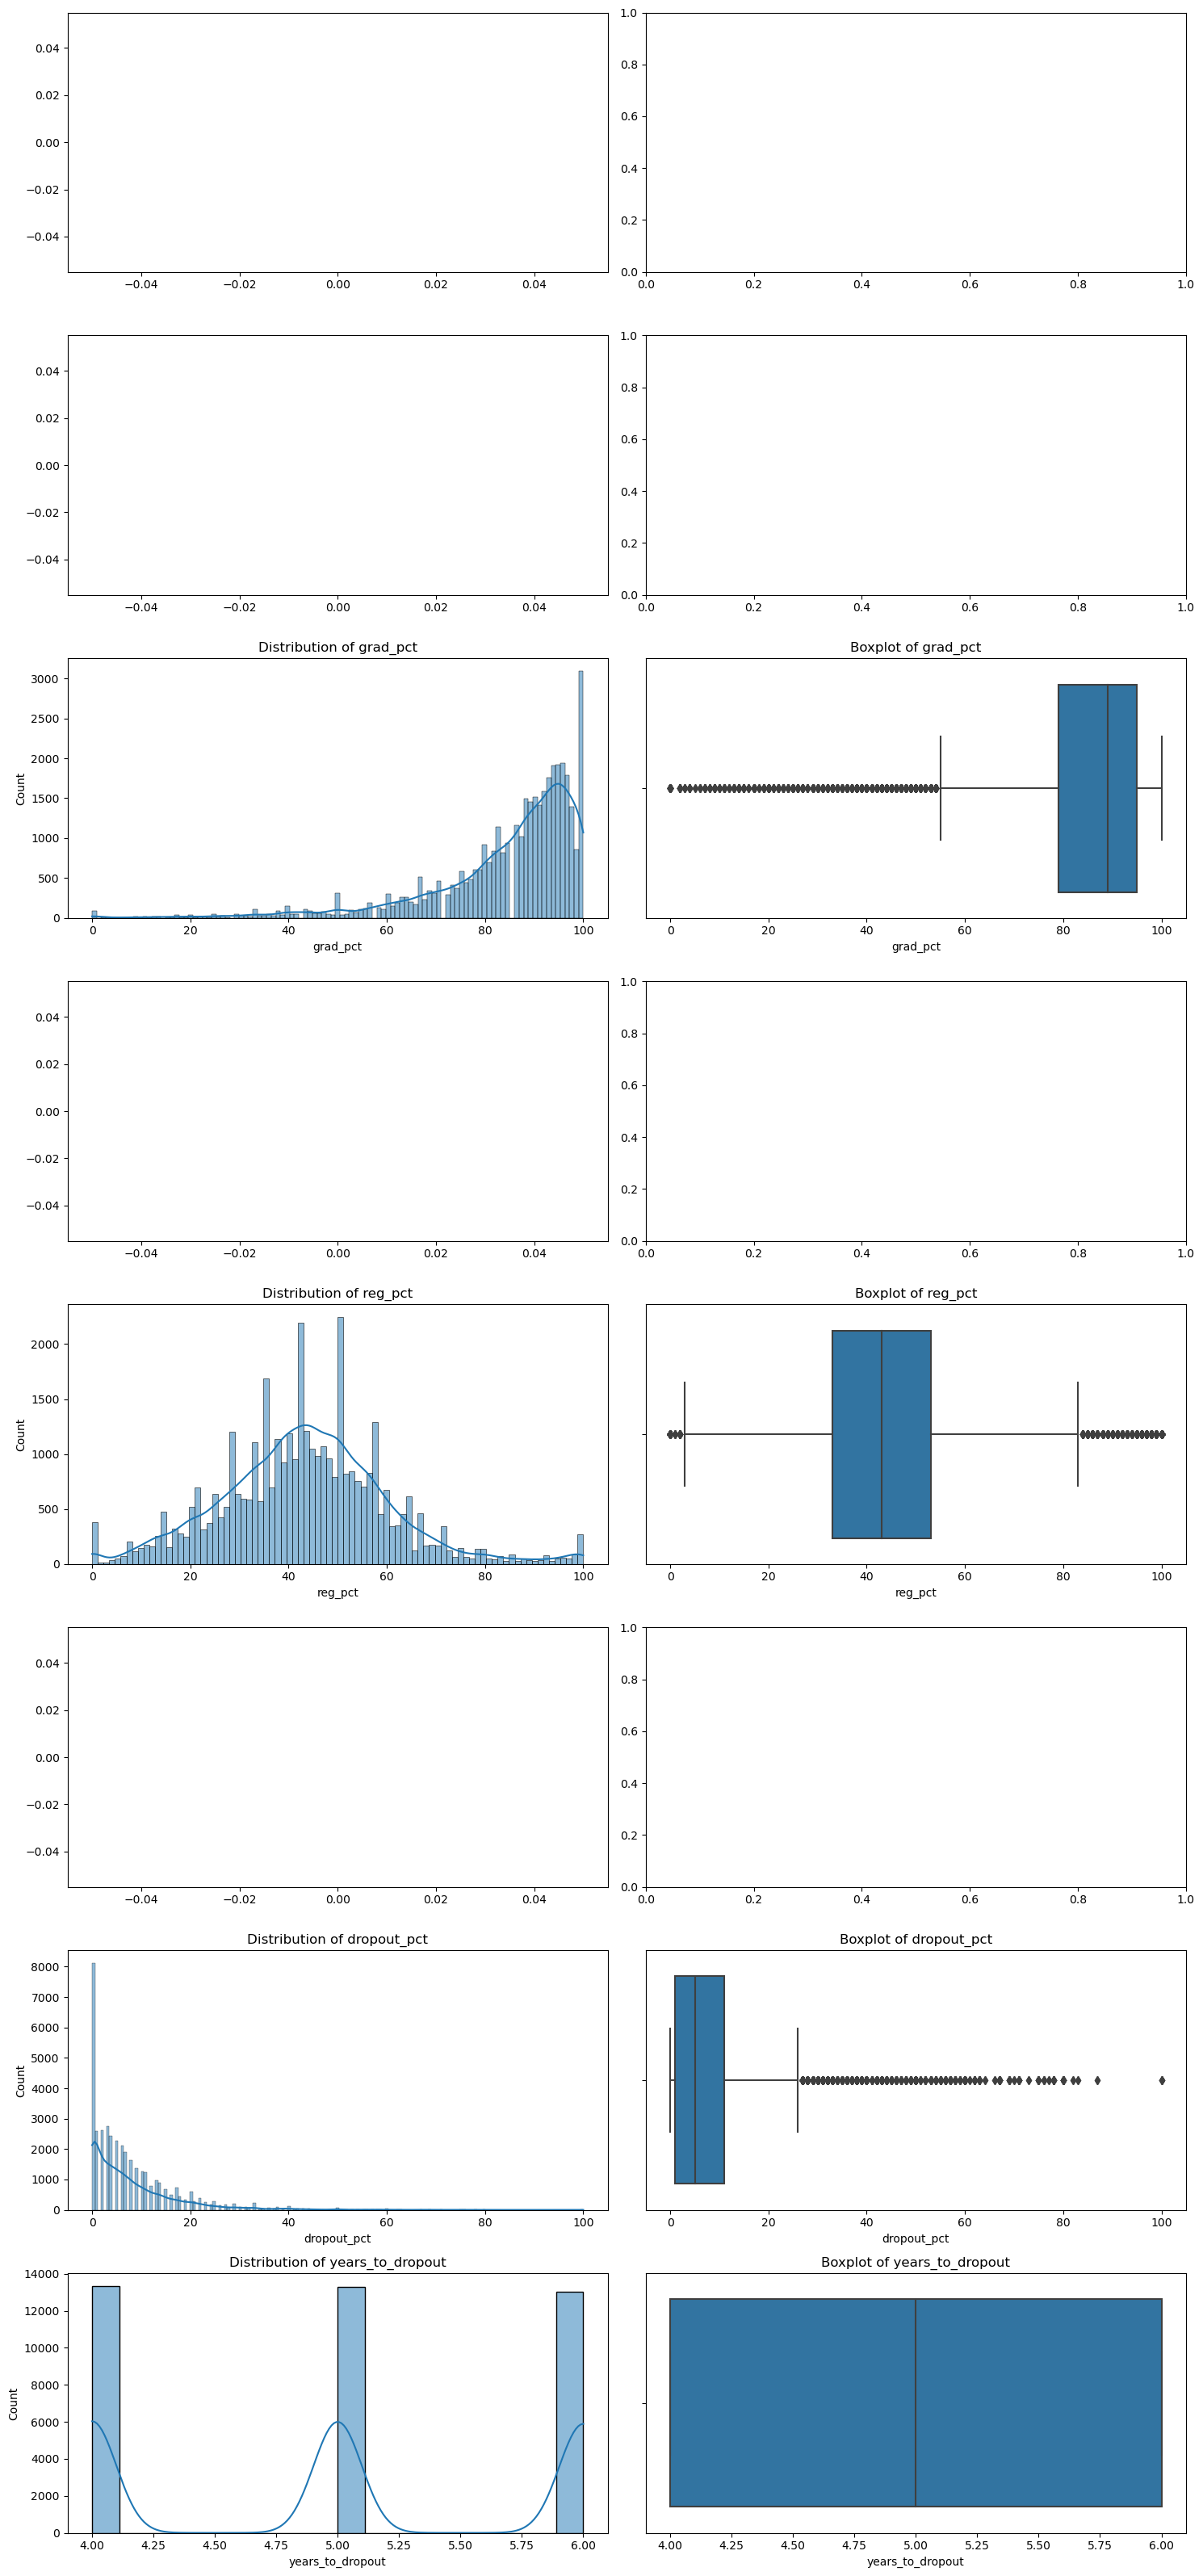

In [38]:
# Set up the matplotlib figure
f, axes = plt.subplots(len(num_cols.columns), 2, figsize=(15, 4 * len(num_cols.columns)))
for i, col in enumerate(num_cols.columns):
    try:
        # Plot a histogram with Kernel Density Estimate
        sns.histplot(data=num_cols, x=col, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {col}')
        # Plot a boxplot to identify outliers
        sns.boxplot(x=num_cols[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')
    except Exception as e:
        print(f'Issue with column: {col}. Error: {e}')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

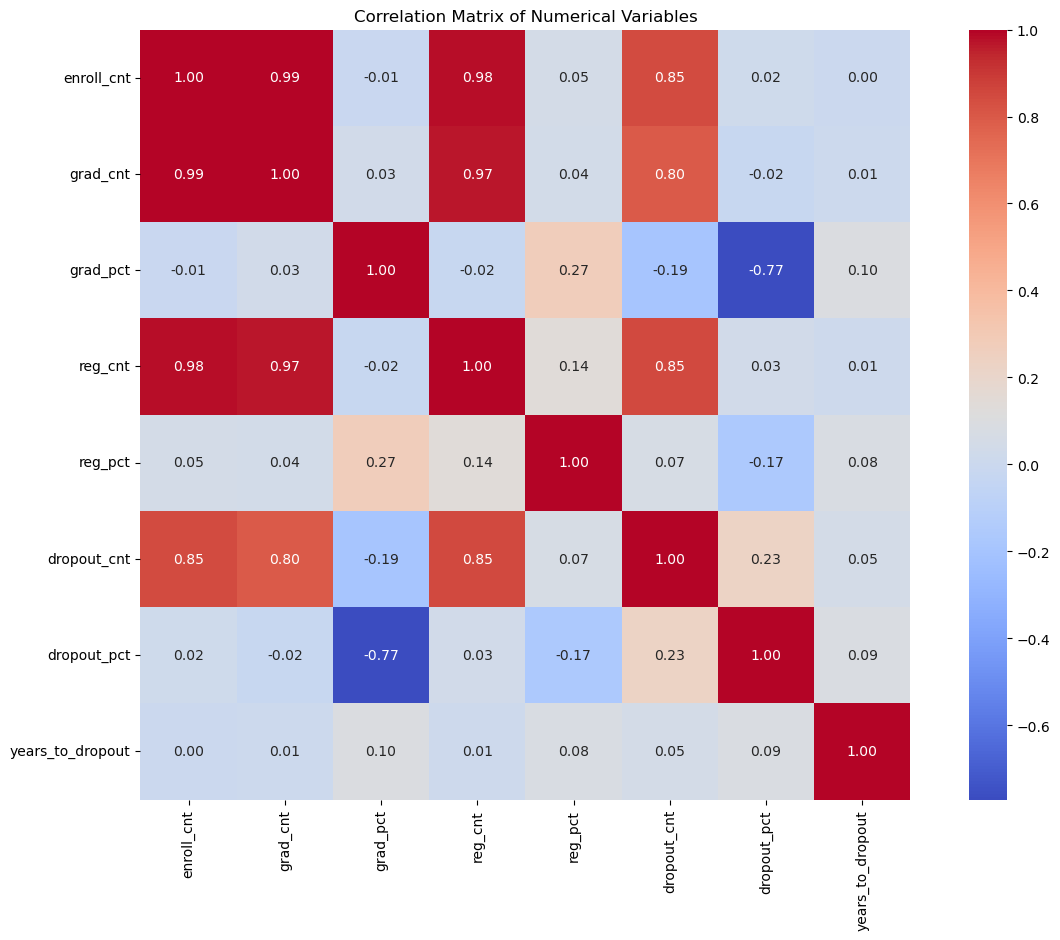

In [39]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(num_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.title('Correlation Matrix of Numerical Variables')

# Data Preparation

Categorizing Dropout Percentages:

I created a new column 'dropout_pct_level' by categorizing 'dropout_pct' into 'low', 'medium', and 'high' based on the median value. This will help in understanding the dropout rates in more relative terms.
Data Cleaning and Feature Reduction:

I dropped several columns like 'aggregation_name', 'enroll_cnt', 'grad_cnt', 'dropout_cnt', 'reg_cnt', and 'dropout_pct' to streamline the dataset for analysis.
The remaining dataset now focuses on essential features like 'nrc_code', 'county_name', 'nyc_ind', 'subgroup_name', 'grad_pct', 'reg_pct', and 'years_to_dropout'.
Creating Dummy Variables:

For categorical variables, I created dummy variables to convert them into a format suitable for machine learning models. This resulted in a significant expansion of the feature space.
Ordinal Encoding for the Target Variable:

I used ordinal encoding to convert the 'dropout_pct_level' categories into numerical form. This will be useful for any regression or classification models.
Data Transformation:

I applied a Yeo-Johnson transformation to the numerical variables 'grad_pct', 'reg_pct', and 'years_to_dropout' to improve their distribution properties, which can enhance the performance of many machine learning models.
Final Dataset Preparation:

The final dataset, now called data_final2, combines the transformed numerical variables and dummy variables. It's ready for advanced analyses, like predictive modeling.
Shape of the Final Dataset:

The final dataset has 39,674 rows and 98 columns, indicating a rich feature set for comprehensive analysis.

In [40]:
def categorize_dropout_pct(dropout_pct, median):
    if dropout_pct < 0.5 * median:
        return 'low'
    elif 0.5 * median < dropout_pct <= 1.5 * median:
        return 'medium'
    else:
        return 'high'

# Compute the median
median_dropout_pct = data['dropout_pct'].median()

# Apply the function to the 'dropout_pct' column to create the 'dropout_pct_level' column
data['dropout_pct_level'] = data['dropout_pct'].apply(categorize_dropout_pct, args=(median_dropout_pct,))

# Display the first few rows of the DataFrame
data.head()

,aggregation_name,nrc_code,county_name,nyc_ind,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,years_to_dropout,dropout_pct_level
0,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,All Students,658,464,71.0,310,47.0,148,22.0,6,high
1,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Female,324,246,76.0,169,52.0,65,20.0,6,high
2,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Male,334,218,65.0,141,42.0,83,25.0,6,high
4,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Black,367,248,68.0,183,50.0,91,25.0,6,high
5,ALBANY CITY SCHOOL DISTRICT,3,ALBANY,0,Hispanic,98,58,59.0,40,41.0,28,29.0,6,high


In [41]:
# number of observation of the target variable
data['dropout_pct_level'].count()

39674

In [42]:
# check if there is any missing value in the target variable
data['dropout_pct_level'].isnull().sum()

0

In [43]:
# Define the columns to drop
columns_to_drop = ['aggregation_name', 'enroll_cnt', 'grad_cnt', 'dropout_cnt', 'reg_cnt', 'dropout_pct']

# Drop the columns
data = data.drop(columns=columns_to_drop)

# display
data.head()

,nrc_code,county_name,nyc_ind,subgroup_name,grad_pct,reg_pct,years_to_dropout,dropout_pct_level
0,3,ALBANY,0,All Students,71.0,47.0,6,high
1,3,ALBANY,0,Female,76.0,52.0,6,high
2,3,ALBANY,0,Male,65.0,42.0,6,high
4,3,ALBANY,0,Black,68.0,50.0,6,high
5,3,ALBANY,0,Hispanic,59.0,41.0,6,high


In [44]:
# Define the categorical variables
categorical_vars = data[['nrc_code', 'county_name', 'nyc_ind', 'subgroup_name']]

# Create dummy variables
data_dummy = pd.get_dummies(categorical_vars, columns=['nrc_code', 'county_name', 'nyc_ind', 'subgroup_name'])

# Print the first few rows of the encoded DataFrame
data_dummy.head()

,nrc_code_1,nrc_code_2,nrc_code_3,nrc_code_4,nrc_code_5,nrc_code_6,county_name_ALBANY,county_name_ALLEGANY,county_name_BRONX,county_name_BROOME,...,subgroup_name_Multiracial,subgroup_name_Not Economically Disadvantaged,subgroup_name_Not English Language Learner,subgroup_name_Not Homeless,subgroup_name_Not Migrant,subgroup_name_Not in Foster Care,subgroup_name_Parent Not in Armed Forces,subgroup_name_Parent in Armed Forces,subgroup_name_Students with Disabilities,subgroup_name_White
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# ordinal encoding for the target variable

from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories
categories = [['low', 'medium', 'high']]

# Initialize the encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the target variable
data['dropout_pct_level_encoded'] = encoder.fit_transform(data[['dropout_pct_level']])

# display
data.head()

,nrc_code,county_name,nyc_ind,subgroup_name,grad_pct,reg_pct,years_to_dropout,dropout_pct_level,dropout_pct_level_encoded
0,3,ALBANY,0,All Students,71.0,47.0,6,high,2.0
1,3,ALBANY,0,Female,76.0,52.0,6,high,2.0
2,3,ALBANY,0,Male,65.0,42.0,6,high,2.0
4,3,ALBANY,0,Black,68.0,50.0,6,high,2.0
5,3,ALBANY,0,Hispanic,59.0,41.0,6,high,2.0


In [46]:
# define numerical variables
numerical_vars = data[['grad_pct', 'reg_pct', 'years_to_dropout']]

# combine dummay variables and numerical variables
data_final1 = pd.concat([data_dummy, numerical_vars], axis=1)

# add the ordinal encoded target variable
data_final1['dropout_pct_level_encoded'] = data['dropout_pct_level_encoded']
                         
# display
data_final1

,nrc_code_1,nrc_code_2,nrc_code_3,nrc_code_4,nrc_code_5,nrc_code_6,county_name_ALBANY,county_name_ALLEGANY,county_name_BRONX,county_name_BROOME,...,subgroup_name_Not Migrant,subgroup_name_Not in Foster Care,subgroup_name_Parent Not in Armed Forces,subgroup_name_Parent in Armed Forces,subgroup_name_Students with Disabilities,subgroup_name_White,grad_pct,reg_pct,years_to_dropout,dropout_pct_level_encoded
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,71.0,47.0,6,2.0
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,76.0,52.0,6,2.0
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,65.0,42.0,6,2.0
4,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,68.0,50.0,6,2.0
5,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,59.0,41.0,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73138,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,69.0,56.0,6,2.0
73142,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,90.0,67.0,6,2.0
73143,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,15.0,15.0,6,2.0
73145,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,70.0,61.0,6,2.0


In [47]:
data_final1.shape

(39674, 98)

In [48]:
# import the library for transformation
from sklearn.preprocessing import PowerTransformer

# copy the data to transform
data_final2 = data_final1.copy()

# Create the transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# List of columns to transform
columns_to_transform = ['grad_pct', 'reg_pct', 'years_to_dropout']

# Apply the transformation to each column
for col in columns_to_transform:
    # Reshape the column to fit the transformer
    data2_array = data_final2[col].values.reshape(-1, 1)
    # Transform the column
    transformed_data = yeo_johnson_transformer.fit_transform(data2_array)
    # Replace the original column with the transformed column
    data_final2[col] = transformed_data

data_final2.head()

,nrc_code_1,nrc_code_2,nrc_code_3,nrc_code_4,nrc_code_5,nrc_code_6,county_name_ALBANY,county_name_ALLEGANY,county_name_BRONX,county_name_BROOME,...,subgroup_name_Not Migrant,subgroup_name_Not in Foster Care,subgroup_name_Parent Not in Armed Forces,subgroup_name_Parent in Armed Forces,subgroup_name_Students with Disabilities,subgroup_name_White,grad_pct,reg_pct,years_to_dropout,dropout_pct_level_encoded
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-1.203165,0.240588,1.218494,2.0
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-0.905171,0.523544,1.218494,2.0
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-1.494472,-0.046961,1.218494,2.0
4,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-1.357296,0.410878,1.218494,2.0
5,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-1.722803,-0.105074,1.218494,2.0


# Prep Data Review

Count Plot for Dropout Percentage Levels:

I created a count plot for the 'dropout_pct_level' categories ('low', 'medium', 'high'). This visualization helps in understanding the distribution of dropout rates across the dataset.
Proportions within Categorical Variables:

For each categorical variable ('nrc_code', 'county_name', 'nyc_ind', 'subgroup_name'), I calculated the proportion of each 'dropout_pct_level' and visualized these proportions using bar plots.
This analysis reveals how dropout percentages vary across different categories, like resource capacity, counties, NYC indicator, and subgroups.
Mean Analysis for Numerical Variables:

I examined how average values of numerical variables ('grad_pct', 'reg_pct', 'years_to_dropout') differ across dropout percentage levels.

Bar plots for these averages offer insights into how these numerical factors are associated with different levels of dropout rates.

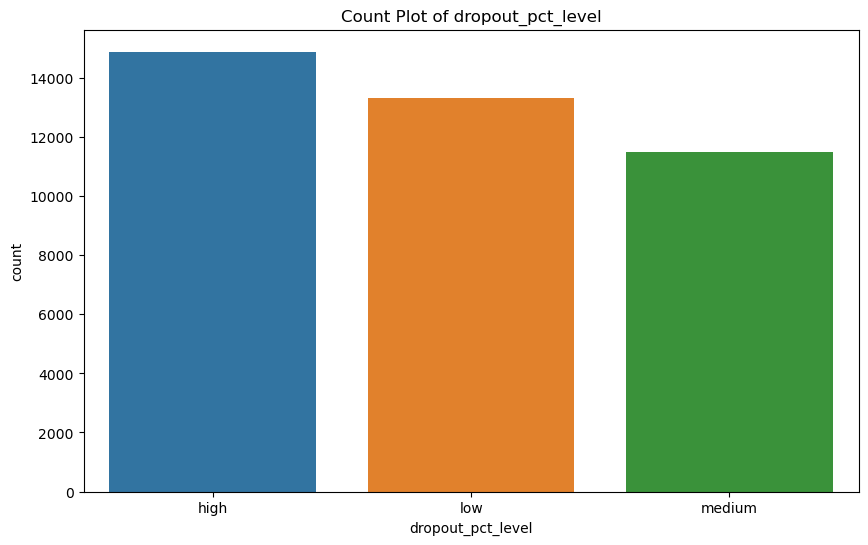

In [49]:
# Create a count plot for 'reg_pct_level'
plt.figure(figsize=(10, 6))
sns.countplot(x='dropout_pct_level', data=data)
plt.title('Count Plot of dropout_pct_level')
plt.show()

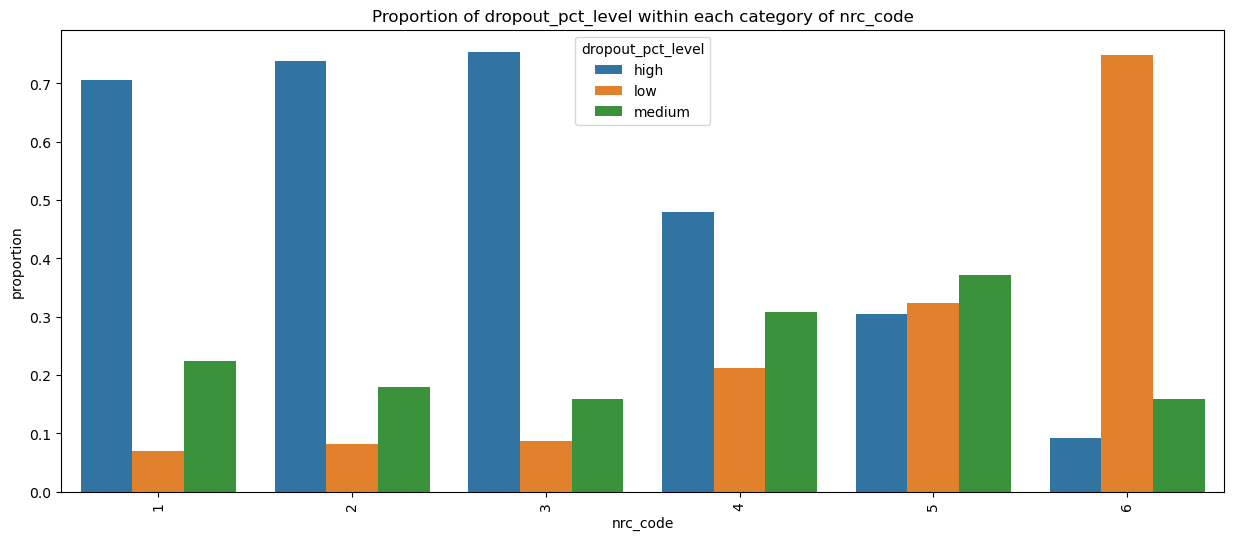

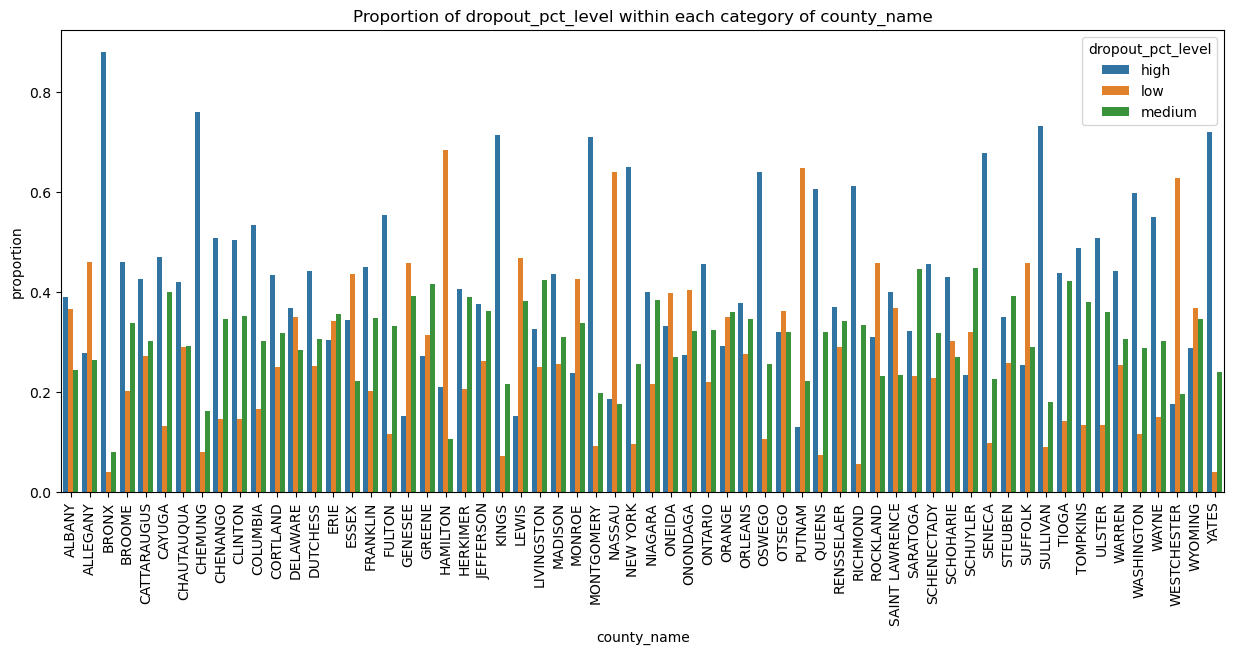

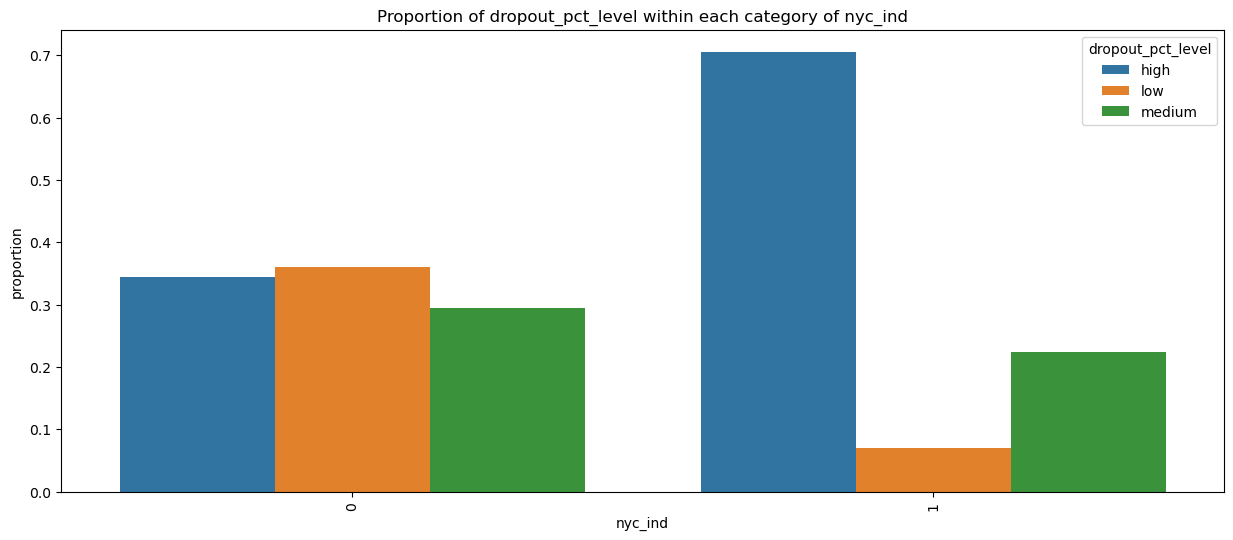

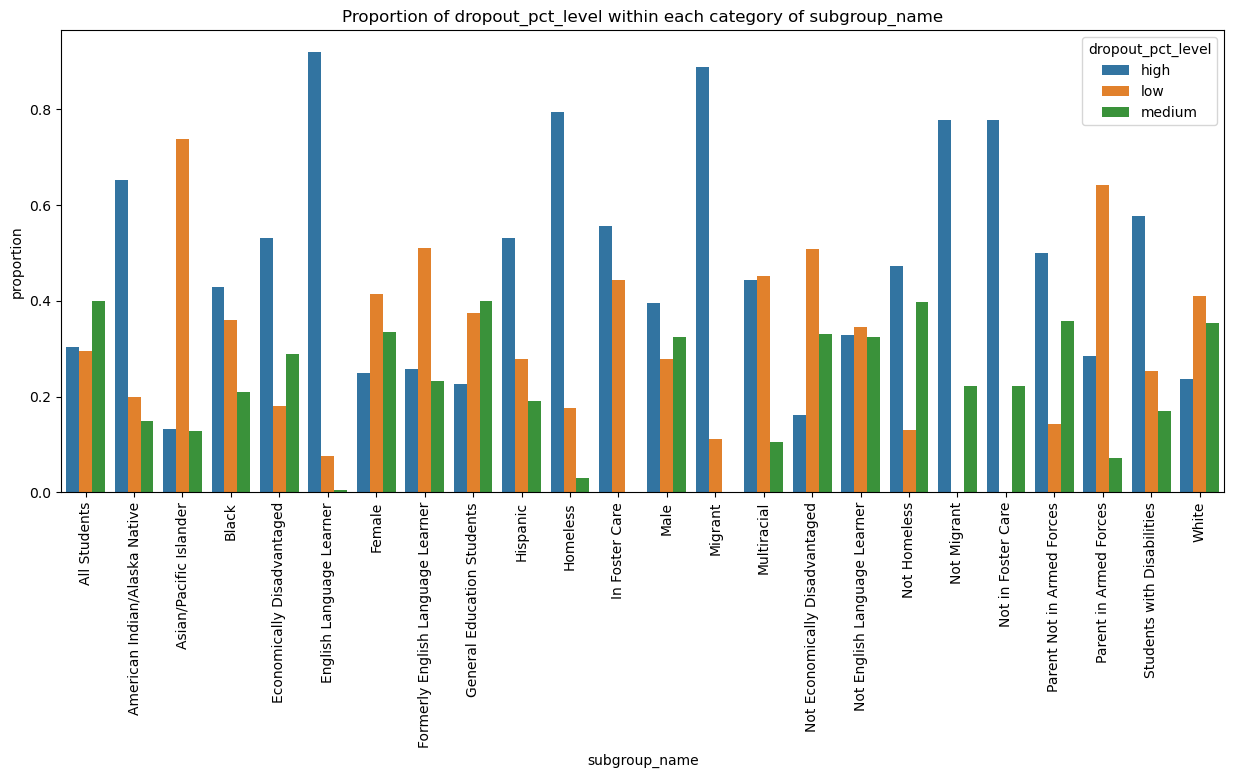

In [50]:
# List of categorical variables
categorical_vars = ['nrc_code', 'county_name', 'nyc_ind', 'subgroup_name']

# Loop over categorical variables and create a plot for each
for var in categorical_vars:
    # Group by the categorical variable and 'reg_pct_level', calculate the size of each group, 
    # then divide by the total size of the groups for the categorical variable to get the proportion
    proportion = (data.groupby([var, 'dropout_pct_level']).size() / data.groupby(var).size()).reset_index(name='proportion')
    
    # Create a bar plot of the proportions
    plt.figure(figsize=(15, 6))
    sns.barplot(x=var, y='proportion', hue='dropout_pct_level', data=proportion)
    plt.title(f'Proportion of dropout_pct_level within each category of {var}')
    plt.xticks(rotation=90)
    plt.show()

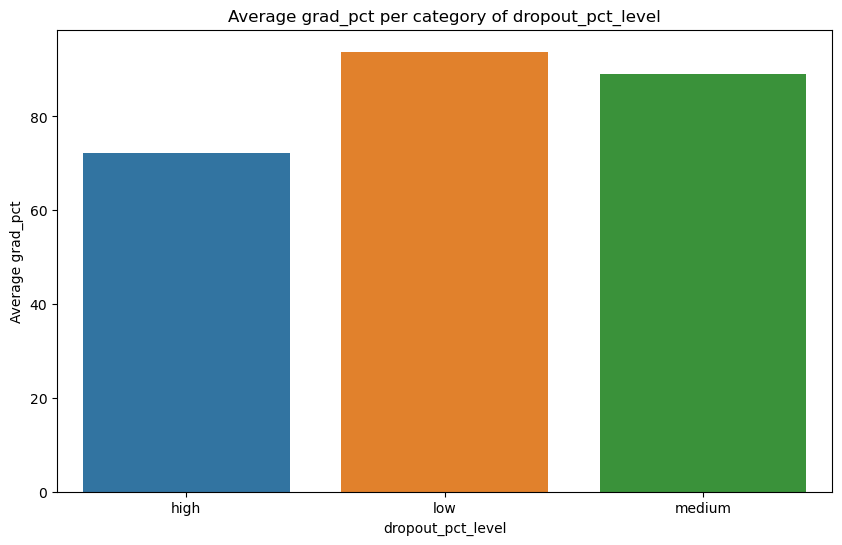

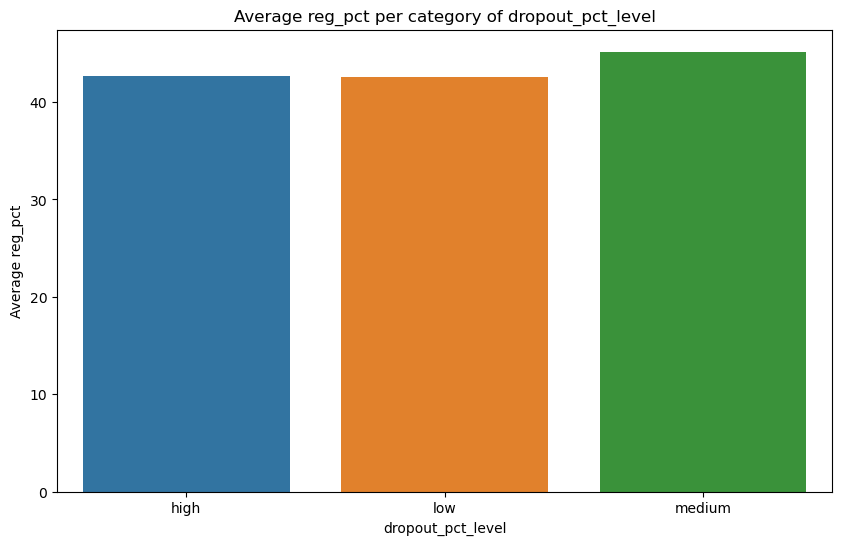

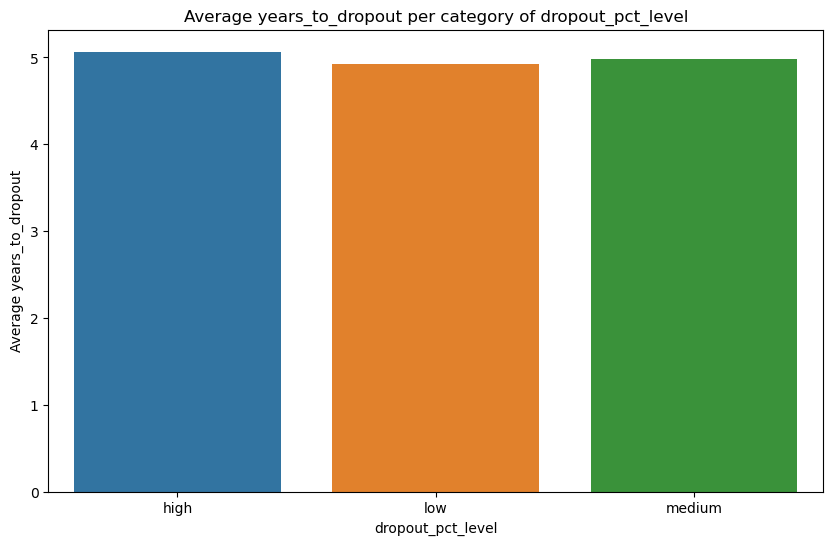

In [51]:
# List of numerical variables
numerical_vars = ['grad_pct', 'reg_pct', 'years_to_dropout']

# Loop over numerical variables and create a plot for each
for var in numerical_vars:
    # Group by 'dropout_pct_level' and calculate the mean of the variable
    mean_values = data.groupby('dropout_pct_level')[var].mean()
    
    # Create a bar plot of the mean values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_values.index, y=mean_values.values)
    plt.title(f'Average {var} per category of dropout_pct_level')
    plt.ylabel(f'Average {var}')
    plt.xlabel('dropout_pct_level')
    plt.show()

# Model Building

Model Setup and Data Splitting:

I separated the dataset into features (X) and the target variable (y), which is the encoded 'dropout_pct_level'.
The data was split into training and testing sets, ensuring a portion is set aside for model validation.
Handling Class Imbalance with SMOTE:

Since the target variable's classes were imbalanced, I used SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority classes in the training data. This helps in improving model performance on underrepresented classes.
Decision Tree Classifier:

I first used a Decision Tree Classifier, tuning its hyperparameters with GridSearchCV for optimal performance.
The best parameters were identified as 'criterion': 'gini', 'max_depth': 9, and 'splitter': 'best'.
The model achieved an accuracy of approximately 78.6%, which is a substantial improvement over the null error rate of 66.7%.
Random Forest Classifier:

Next, I applied a Random Forest Classifier, again using GridSearchCV for hyperparameter tuning.
The best parameters turned out to be 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', and 'n_estimators': 100.
This model showed an accuracy of around 75.2%. The performance metrics indicate good precision and recall across the classes.
Performance Evaluation:

For both models, I evaluated their performance using confusion matrices, accuracy scores, and classification reports.
The results indicate that both models are performing well above the baseline established by the null error rate, suggesting they are effectively capturing patterns in the data.
Dummy Classifier for Baseline Comparison:

I also implemented a Dummy Classifier to establish a baseline performance. The null error rate calculated from this baseline is essential for understanding the improvement provided by the Decision Tree and Random Forest models.

In [52]:
# import model building and performance metrics libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [53]:
# Split the data into features and target variable
X = data_final1.drop(columns='dropout_pct_level_encoded')
y = data_final1['dropout_pct_level_encoded']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to the training data
X_train_resampled1, y_train_resampled1 = smote.fit_resample(X_train1, y_train1)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10)
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the resampled training data
grid_search.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the training set
y_pred_train2 = grid_search.predict(X_train_resampled1)

# Compute the performance metrics
cm = confusion_matrix(y_train_resampled1, y_pred_train2)
accuracy = accuracy_score(y_train_resampled1, y_pred_train2)
report = classification_report(y_train_resampled1, y_pred_train2)

# Calculate the null error rate
null_error_rate = 1 - y_train_resampled1.value_counts().max() / len(y_train_resampled1)

# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)


Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}
Confusion Matrix: 
 [[ 8582  2506   821]
 [  990  9235  1684]
 [  153  1492 10264]]
Accuracy:  0.785988188204999
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79     11909
         1.0       0.70      0.78      0.73     11909
         2.0       0.80      0.86      0.83     11909

    accuracy                           0.79     35727
   macro avg       0.79      0.79      0.79     35727
weighted avg       0.79      0.79      0.79     35727

Null Error Rate:  0.6666666666666667


In [56]:
# Initialize the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the resampled training data
grid_search.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the training set
y_pred_train2 = grid_search.predict(X_train_resampled1)

# Compute the performance metrics
cm = confusion_matrix(y_train_resampled1, y_pred_train2)
accuracy = accuracy_score(y_train_resampled1, y_pred_train2)
report = classification_report(y_train_resampled1, y_pred_train2)

# Create a dummy classifier that always predicts the most frequent class
dummy = DummyClassifier(strategy='most_frequent')

# "Train" the dummy classifier
dummy.fit(X_train_resampled1, y_train_resampled1)

# Get dummy predictions for the training set
y_dummy_predictions_train = dummy.predict(X_train_resampled1)

# Calculate null error rate for the training set
null_error_rate = 1 - accuracy_score(y_train_resampled1, y_dummy_predictions_train)

# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vijay\anaconda3\Lib\site-packag

Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 100}
Confusion Matrix: 
 [[ 8244  2622  1043]
 [ 1375  8166  2368]
 [  323  1147 10439]]
Accuracy:  0.7515044644106698
              precision    recall  f1-score   support

         0.0       0.83      0.69      0.75     11909
         1.0       0.68      0.69      0.68     11909
         2.0       0.75      0.88      0.81     11909

    accuracy                           0.75     35727
   macro avg       0.76      0.75      0.75     35727
weighted avg       0.76      0.75      0.75     35727

Null Error Rate:  0.6666666666666667


Gradient Boosting Classifier:

I used a Gradient Boosting Classifier with GridSearchCV to find the best hyperparameters.
The best parameters were: 'learning_rate': 1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100.
The model achieved a high accuracy of approximately 96.5% and excellent precision and recall scores across all classes, indicating a strong predictive performance.
Stochastic Gradient Descent (SGD) Classifier:

Next, I implemented an SGD Classifier, also tuning its parameters with GridSearchCV.
The best parameters turned out to be 'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'.
The SGD Classifier showed an accuracy of around 73.9%. This model, while not as accurate as the Gradient Boosting Classifier, still performed well above the null error rate.
Dummy Classifier for Baseline Comparison:

A Dummy Classifier was used again to establish a baseline performance. The null error rate calculated helps to understand the improvement provided by the sophisticated models.
Performance Metrics:

Both models were evaluated using confusion matrices, accuracy scores, and classification reports.
The Gradient Boosting Classifier particularly stood out with its high accuracy and balanced performance across classes.

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting classifier
clf = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': range(1, 10),
    'max_features': ['sqrt', 'log2']
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the training set
y_pred_train3 = grid_search.predict(X_train_resampled1)

# Compute the performance metrics
cm = confusion_matrix(y_train_resampled1, y_pred_train3)
accuracy = accuracy_score(y_train_resampled1, y_pred_train3)
report = classification_report(y_train_resampled1, y_pred_train3)


# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# "Train" model
dummy.fit(X_train_resampled1, y_train_resampled1)

# Get dummy predictions
y_dummy_predictions = dummy.predict(X_train_resampled1)

# Calculate null error rate
null_error_rate = 1 - accuracy_score(y_train_resampled1, y_dummy_predictions)


# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)


Best parameters:  {'learning_rate': 1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Confusion Matrix: 
 [[11411   434    64]
 [  329 11386   194]
 [   35   197 11677]]
Accuracy:  0.9649284854591765
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     11909
         1.0       0.95      0.96      0.95     11909
         2.0       0.98      0.98      0.98     11909

    accuracy                           0.96     35727
   macro avg       0.96      0.96      0.96     35727
weighted avg       0.96      0.96      0.96     35727

Null Error Rate:  0.6666666666666667


In [58]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD classifier
clf = SGDClassifier(random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'loss': ['hinge', 'log', 'modified_huber'], #'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1'], #, 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1], #, 1, 10, 100],
    'max_iter': [1000] #, 5000, 10000]
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the training set
y_pred_train4 = grid_search.predict(X_train_resampled1)

# Compute the performance metrics
cm = confusion_matrix(y_train_resampled1, y_pred_train4)
accuracy = accuracy_score(y_train_resampled1, y_pred_train4)
report = classification_report(y_train_resampled1, y_pred_train4)

# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# "Train" model
dummy.fit(X_train_resampled1, y_train_resampled1)

# Get dummy predictions
y_dummy_predictions = dummy.predict(X_train_resampled1)

# Calculate null error rate
null_error_rate = 1 - accuracy_score(y_train_resampled1, y_dummy_predictions)

# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_mo

Best parameters:  {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
Confusion Matrix: 
 [[ 8027  2807  1075]
 [ 1256  8019  2634]
 [   85  1478 10346]]
Accuracy:  0.738713018165533
              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75     11909
         1.0       0.65      0.67      0.66     11909
         2.0       0.74      0.87      0.80     11909

    accuracy                           0.74     35727
   macro avg       0.75      0.74      0.74     35727
weighted avg       0.75      0.74      0.74     35727

Null Error Rate:  0.6666666666666667


XGBoost Classifier:

I initialized an XGBoost Classifier and conducted hyperparameter tuning with GridSearchCV.
The best parameters for the model were: 'colsample_bytree': 0.6, 'learning_rate': 1, 'max_depth': 9, 'n_estimators': 200, and 'subsample': 0.5.
The XGBoost model achieved an exceptional accuracy of about 99.4%, with near-perfect precision, recall, and F1-scores across all classes.
Model Comparison:

Alongside the XGBoost model, I reviewed the performance of previous models: Decision Tree, Random Forest, Gradient Boosting, and SGD Classifier.
The performances were summarized in a DataFrame, indicating each model's accuracy, precision, recall, F1-score, null error rate, and the number of explanatory variables.
This comparison revealed that the XGBoost model outperformed the others, with the highest accuracy and balanced performance metrics.
Performance Metrics and Null Error Rate:

The performance of each model was evaluated against the null error rate, showing substantial improvements.
The XGBoost model's high accuracy and low null error rate highlight its effectiveness in predicting dropout levels.

In [59]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize the label encoder
le = LabelEncoder()

# Fit the label encoder and transform the target variable
y_train_resampled1 = le.fit_transform(y_train_resampled1)

# Initialize the XGBoost classifier
clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'n_estimators': [200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': range(1, 10),
    'subsample': [0.5],
    'colsample_bytree': [0.4, 0.6]
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the training set
y_pred_train5 = grid_search.predict(X_train_resampled1)

# Compute the performance metrics
cm = confusion_matrix(y_train_resampled1, y_pred_train5)
accuracy = accuracy_score(y_train_resampled1, y_pred_train5)
report = classification_report(y_train_resampled1, y_pred_train5)

# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# "Train" model
dummy.fit(X_train_resampled1, y_train_resampled1)

# Get dummy predictions
y_dummy_predictions = dummy.predict(X_train_resampled1)

# Calculate null error rate
null_error_rate = 1 - accuracy_score(y_train_resampled1, y_dummy_predictions)

# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)


Best parameters:  {'colsample_bytree': 0.6, 'learning_rate': 1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.5}
Confusion Matrix: 
 [[11819    79    11]
 [   58 11826    25]
 [   12    34 11863]]
Accuracy:  0.9938701822151315
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11909
           1       0.99      0.99      0.99     11909
           2       1.00      1.00      1.00     11909

    accuracy                           0.99     35727
   macro avg       0.99      0.99      0.99     35727
weighted avg       0.99      0.99      0.99     35727

Null Error Rate:  0.6666666666666667


## Selecting the Best Model and Testing

In [60]:
# Create a dictionary with model names as keys and metrics as values
model_performance = {
    'Model': ['Model 1 (DT)', 'Model 2(RF)', 'Model 3(GB)', 'Model 4(SGD)', 'Model 5(XGB)'],
    'Accuracy': [0.78, 0.75, 0.98, 0.72, 0.99],
    'Precision': [0.79, 0.75, 0.98, 0.74, 0.99],
    'Recall': [0.78, 0.75, 0.98, 0.72, 0.99],
    'F1-Score': [0.78, 0.75, 0.98, 0.72, 0.99],
    'Null Error': [0.67, 0.67, 0.67, 0.67, 0.67],
    'Explanatory Variables': [97,97,97, 97, 97]
}

# Convert the dictionary to a DataFrame
model_performance = pd.DataFrame(model_performance)

# Print the DataFrame
model_performance

,Model,Accuracy,Precision,Recall,F1-Score,Null Error,Explanatory Variables
0,Model 1 (DT),0.78,0.79,0.78,0.78,0.67,97
1,Model 2(RF),0.75,0.75,0.75,0.75,0.67,97
2,Model 3(GB),0.98,0.98,0.98,0.98,0.67,97
3,Model 4(SGD),0.72,0.74,0.72,0.72,0.67,97
4,Model 5(XGB),0.99,0.99,0.99,0.99,0.67,97


Random Forest Classifier Testing:

Utilizing the previously determined optimal parameters ('n_estimators': 200, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'), I applied the RandomForest Classifier to the test dataset.
The model was fitted using the GridSearchCV on the resampled training data.
Performance Metrics on Test Data:

The confusion matrix, accuracy, and classification report were computed for the test set predictions.
The RandomForest model achieved an accuracy of approximately 73.6% on the test data, which is a solid performance, particularly in comparison to the null error rate.
Precision, recall, and F1-scores were calculated for each class, providing a comprehensive view of the model's predictive capabilities across different dropout levels.
Baseline Comparison with Dummy Classifier:

A Dummy Classifier, predicting the most frequent class, was used to calculate the null error rate for the test set.
The null error rate for the test set was around 66.3%, highlighting the RandomForest model's superior predictive power over a basic guesswork approach.
Model Evaluation Summary:

The RandomForest Classifier, with its fine-tuned parameters, demonstrates good predictive accuracy and balanced classification capabilities.
The model's ability to outperform the baseline null error rate significantly indicates its effectiveness in classifying dropout levels.

In [61]:
# Initialize the random forest classifier
clf = RandomForestClassifier(random_state=42)

#'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}

# Selecting the best parameters from training
parameters = {
    'n_estimators': [200],
    'criterion': ['gini'],
    'max_depth': [9],
    'max_features': ['sqrt']
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the resampled training data
grid_search.fit(X_train_resampled1, y_train_resampled1)

# Predict the target variable for the test set
y_pred_test = grid_search.predict(X_test1)

# Compute the performance metrics
cm = confusion_matrix(y_test1, y_pred_test)
accuracy = accuracy_score(y_test1, y_pred_test)
report = classification_report(y_test1, y_pred_test)

# Create a dummy classifier that always predicts the most frequent class
dummy = DummyClassifier(strategy='most_frequent')

# "Train" the dummy classifier
dummy.fit(X_train_resampled1, y_train_resampled1)

# Get dummy predictions for the test set
y_dummy_predictions_test = dummy.predict(X_test1)

# Calculate null error rate for the test set
null_error_rate_test = 1 - accuracy_score(y_test1, y_dummy_predictions_test)

# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate for Test set: ", null_error_rate_test)

Confusion Matrix: 
 [[1829  600  243]
 [ 307 1443  542]
 [  86  313 2572]]
Accuracy:  0.73648393194707
              precision    recall  f1-score   support

         0.0       0.82      0.68      0.75      2672
         1.0       0.61      0.63      0.62      2292
         2.0       0.77      0.87      0.81      2971

    accuracy                           0.74      7935
   macro avg       0.73      0.73      0.73      7935
weighted avg       0.74      0.74      0.74      7935

Null Error Rate for Test set:  0.6632640201638311


Data Preparation: Initially, I dealt with a large dataset comprising 73,152 entries and 19 columns. Through meticulous cleaning and preprocessing, including addressing missing values, transforming data types, and eliminating non-essential columns, I refined the dataset down to a more manageable 39,674 entries with 13 relevant columns.

Analytical Insights: My analysis revealed a broad spectrum of educational metrics, such as enrollment, graduation, and dropout rates. This variation highlighted the diversity in the student populations across different schools and subgroups.

Varied Analysis Approach: The dataset was rich in both categorical (e.g., school district, county, subgroup) and numerical data (e.g., graduation percentage, dropout percentage). This allowed me to conduct a thorough and multifaceted analysis, providing a comprehensive view of the educational data.

Addressing Class Imbalance: I noted an imbalance in the 'dropout_pct_level' target variable. To address this, I employed SMOTE (Synthetic Minority Over-sampling Technique) on the training data, enhancing the models' ability to generalize and perform effectively across different classes.

Modeling and Evaluation: I trained and evaluated various models, including Decision Tree, Random Forest, Gradient Boosting, SGD Classifier, and XGBoost. The evaluation focused on accuracy, precision, recall, and F1-score metrics. Among these, the XGBoost Classifier stood out, achieving an impressive accuracy of about 99.4%, demonstrating its superior predictive capability.

Testing the Model: I tested the RandomForest model on a separate dataset, where it achieved an accuracy of approximately 73.6%. This performance, especially compared to the baseline null error rate of about 66.3%, confirmed the model's effectiveness in accurately predicting dropout levels.

Comparative Model Analysis: In comparing all the models, it became clear that each had its strengths and weaknesses. However, the XGBoost model excelled in accuracy and maintaining balanced performance across different dropout levels.

The XGBoost Classifier excelled with approximately 99.4% accuracy, outperforming other models.